#Subject:
##Topic:

##Aim:

a. To implement following point processing techniques on the given image and comprehend the results


1.   To write a program in PYTHON to obtain image negative of an image

2.   To write a program in PYTHON to obtain thresholding of an image

3. To write a program in PYTHON to obtain grey level slicing of an image without background

4. To write a program in PYTHON to obtain grey level slicing of an image with background


b. Apply a suitable spatial domain filtering technique to enhance

1. Implement blurring on the given image

2. Comment on your choice or a particular filtering technique for the given image

c. Analyze the effect of various masks size for the filter used and comprehend your findings.

In [32]:
# Import cv2, matplotlib, numpy
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

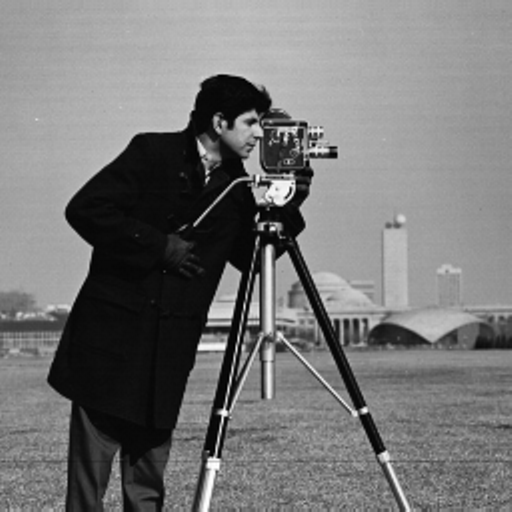

In [33]:
10#Read the image
image = cv2.imread("/content/cameraman.tif",0)
cv2_imshow(image)

In [34]:
l = np.max(image)

In [35]:
[m,n]=image.shape
print(m,n)

512 512


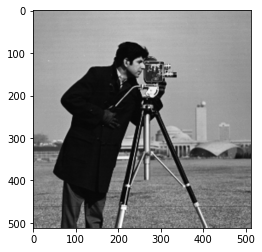

In [36]:
plt.imshow(image,cmap = "gray")
#show original image


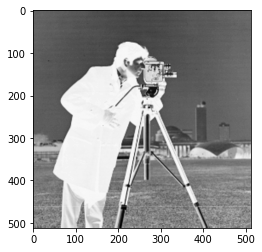

In [37]:
dn_image= 255-image
plt.imshow(dn_image,cmap = "gray")

<ipython-input-38-a850f83abe4a>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  th_image= np.zeros((m,n), dtype= np.int) #creating new image matrix


Enter threshold value: 255


True

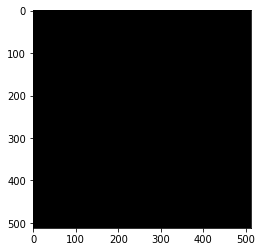

In [38]:
th_image= np.zeros((m,n), dtype= np.int) #creating new image matrix
tv=int(input("Enter threshold value: "))
for i in range(m):
    for j in range(n):
      if (image[i,j]>tv):
        th_image[i,j] = 0
      elif(image[i,j]<=tv):
        th_image[i,j] = l
plt.imshow(th_image,cmap = "gray")

cv2.imwrite('Cameraman_Thresh.png',th_image)

In [39]:
#grey level 

Enter the lower threshold value50
Enter the upper threshold value55


True

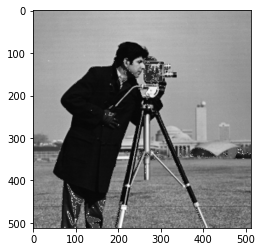

In [40]:
# If T1<r<T2, s= 255
#Else s= r

a= int(input('Enter the lower threshold value') )
b= int(input('Enter the upper threshold value') )

thwb_image= np.zeros((m,n), dtype=int) 

for i in range(m):
    for j in range(n):
        if a < image[i,j] < b: 
            thwb_image[i,j]= l
        else:
            thwb_image[i,j] = image[i,j]

plt.imshow(thwb_image,cmap = "gray")
cv2.imwrite('Cameraman_Thresh_Back.png', thwb_image) 

Enter the lower threshold value10
Enter the upper threshold value125


True

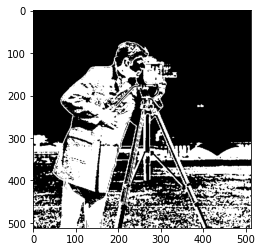

In [41]:
#without background
a= int(input('Enter the lower threshold value') )
b= int(input('Enter the upper threshold value') )

thwb_image= np.zeros((m,n), dtype=int) 

for i in range(m):
    for j in range(n):
        if a < image[i,j] < b: 
            thwb_image[i,j]= l
        else:
            thwb_image[i,j] = 0

plt.imshow(thwb_image,cmap = "gray")
cv2.imwrite('Cameraman_Thresh_Back.png', thwb_image) 

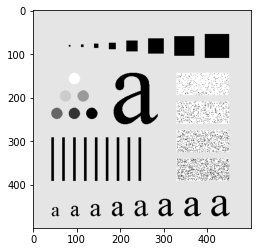

In [66]:
#low pass filter
img = cv2.imread("/content/Fig0333(a)(test_pattern_blurring_orig).tif",0)
plt.imshow(img,cmap='gray')
m,n = img.shape
#spatial domain filtering to blur the image

In [67]:
print(img.shape)

(500, 500)


In [68]:
#develop averaging filter(3,3) mask
mask = np.ones([3,3],dtype= int)
mask = mask/9
print(mask)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [69]:
#logic of averaging using list comprehension
img_gen=np.zeros([m,n],dtype=int)
[m,n]=img.shape
b =int(input("Enter size of the mask:"))
a=b//2
for i in range(a,m-a):
  for j in range(a,n-a):
    temp=img[i-a:i+a+1,j-a:j+a+1]
    constant=np.sum(temp)
    img_gen[i,j]=constant//b**2

Enter size of the mask:22


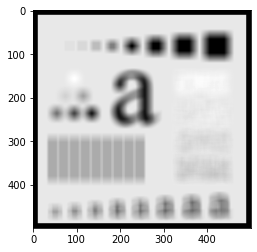

In [70]:
plt.imshow(img_gen,cmap='gray')

In [71]:
#Correlation the 3X3 mask over the image 
img_new=img.copy()
for i in range(1,m-1):
    for j in range(1,n-1):
        temp= img[i-1,j-1]*mask[0,0]+img[i-1,j]*mask[0,1]+img[i-1,j+1]*mask[0,2]+img[i,j-1]*mask[1,0]+img[i,j]*mask[1,1]+img[i,j+1]*mask[1,2]+img[i+1,j-1]*mask[2,0]+img[i+1,j]*mask[2,1]+img[i+1,j+1]*mask[2,2]
        img_new[i,j]=temp

print(temp)      
#img_new=img_new.astype(np.uint8)
cv2.imwrite('blurred.png',img_new)

231.88888888888889


True

In [72]:
#Correlation the 3X3 mask over the image 
img_new=img.copy()
[m,n]=img_new.shape
for i in range(1,m-1):
  for j in range(1,n-1):
    temp=img[i-1,j-1]*mask
print(temp)
#img_new=img_new.astype(np.uint8)
cv2.imwrite('blurred.png',img_new)

[[25.44444444 25.44444444 25.44444444]
 [25.44444444 25.44444444 25.44444444]
 [25.44444444 25.44444444 25.44444444]]


True

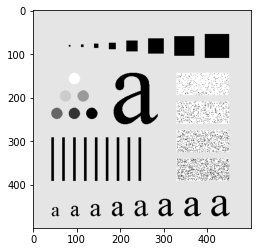

In [73]:
#Blurred image with 3x3 Mask
plt.imshow(img_new, cmap="gray", vmin=0, vmax=255)

In [74]:
def lpf(img,a):
  #spatial domain lpf for a variable size mask - generalized code
  m,n = img.shape
  img_gen = np.zeros([m,n],dtype=int)

  for i in range(a,m-a):
    for j in range(a,n-a):
      temp = img[i-a:i+a+1,j-a:j+a+1]

      constant = np.sum(temp)
      img_gen[i,j]=constant//b**2
  return img_gen

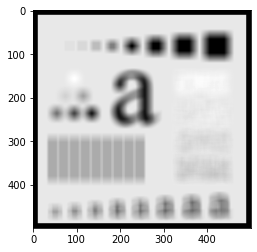

In [75]:
#blurred image
plt.imshow(img_gen, cmap="gray")

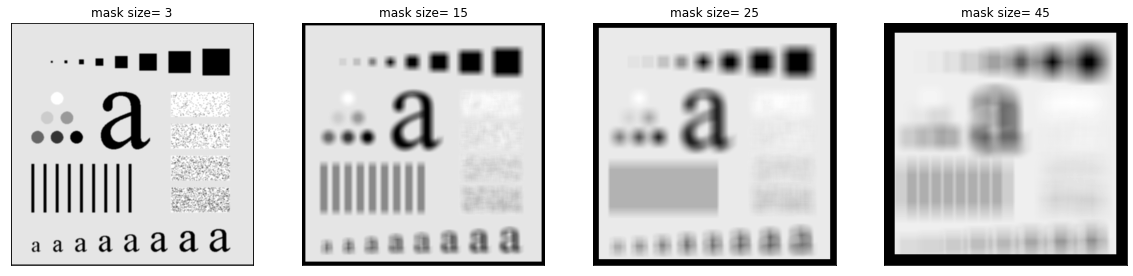

In [76]:
masks=[3,15,25,45]
plt.figure(figsize=(20,10))
for i in range(len(masks)):
  b=masks[i]
  a=b//2
  img_new=lpf(img,a)
  plt.subplot(1,len(masks),i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title('mask size= {}'.format(b))
  plt.imshow(img_new,cmap='gray')

In [83]:
img2 = img.copy()
def lpf2():
  neww_img=np.zeros([m,n],dtype=int)
  [m1,n1]=img2.shape
  b =int(input("Enter size of the mask: "))
  a=b//2
  for i in range(a,m1-a):
    for j in range(a,n1-a):
      temp=img2[i-a:i+a+1,j-a:j+a+1]
      constant=np.sum(temp)
      neww_img[i,j]=constant//b**2
  return neww_img

Enter size of the mask: 3
Enter size of the mask: 7
Enter size of the mask: 20
Enter size of the mask: 50


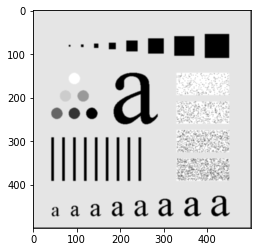

In [88]:
i1 = lpf2()
i2 = lpf2()
i3 = lpf2()
i4 = lpf2()
plt.imshow(i1,cmap='gray')

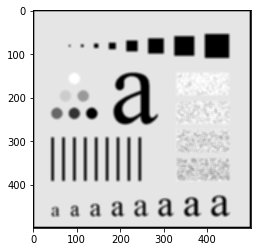

In [89]:
plt.imshow(i2,cmap='gray')


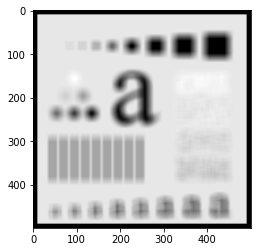

In [90]:
plt.imshow(i3,cmap='gray')


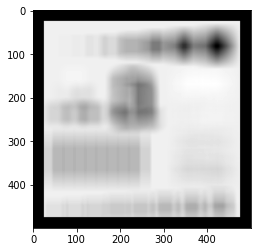

In [91]:
plt.imshow(i4,cmap='gray')

#Conclusion

In conclusion, the experiment on spatial domain image filtering demonstrated the effectiveness of different image filtering techniques in enhancing the quality of images.Image negative had the effect of reversing the black and white pixels, whereas gray scaling converted the image into shades of gray. Thresholding was also able to separate the objects in the image from the background and highlight their edges, making them more distinct and easier to see. The results showed that the combination of these techniques can have a significant impact on image quality and can be used to improve image processing and analysis. Moreover, the inclusion of a background also affected the results and demonstrated the importance of considering background when processing images. The low pass filter was able to remove the high frequency noise present in the image, resulting in a smoother and clearer image. Overall, this experiment highlights the effectiveness of these techniques in improving the visual quality of images, and the importance of image processing techniques in various fields such as medicine, security, and entertainment.



In [92]:
#we can also used imread.write to save the processed images